Handwritten digits classification using neural network

In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
y_train.shape

(60000,)

In [7]:
X_test.shape

(10000, 28, 28)

In [8]:
y_test.shape

(10000,)

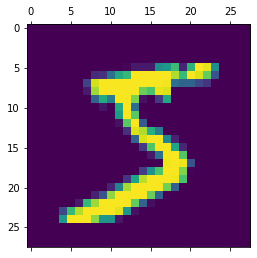

In [9]:
plt.matshow(X_train[0])

In [10]:
y_train[0]

5

In [11]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

(60000,28,28) we have flatten this X_train into (60000,784)

Because model accuracy is low when we compiled , to improve scaling by 255

In [12]:
X_train = X_train/255
X_test  = X_test/255

In [13]:
X_train_flattened =X_train.reshape(len(X_train),28*28)
X_test_flattened =X_test.reshape(len(X_test),28*28)

In [14]:
X_train_flattened.shape

(60000, 784)

2 dimensional array of X_train

In [15]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

2 dimensional array of X_train converted into single dimension X_train_flattened by numpy(reshape)

In [16]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

Very simple neural network with no hidden layers

In [17]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
    
])
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(X_train_flattened,y_train,epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 32us/sample - loss: 0.4883 - accuracy: 0.8778s - loss: 0.5504 
Epoch 2/10
60000/60000 [==============================] - 2s 26us/sample - loss: 0.3062 - accuracy: 0.9153ETA: 0s - loss: 0.3127 - accuracy - ETA: 0s - loss: 0.3086 - 
Epoch 3/10
60000/60000 [==============================] - 2s 25us/sample - loss: 0.2857 - accuracy: 0.9210
Epoch 4/10
60000/60000 [==============================] - 2s 28us/sample - loss: 0.2748 - accuracy: 0.9235
Epoch 5/10
60000/60000 [==============================] - 2s 25us/sample - loss: 0.2677 - accuracy: 0.9262
Epoch 6/10
60000/60000 [==============================] - 2s 26us/sample - loss: 0.2626 - accuracy: 0.9275
Epoch 7/10
60000/60000 [==============================] - 2s 30us/sample - loss: 0.2591 - accuracy: 0.9284
Epoch 8/10
60000/60000 [==============================] - 2s 28us/sample - loss: 0.2555 - accuracy: 0.9299s - loss: 0.2512 -  - ETA: 0s
Epoch 9/10
600

As accuracy is low in above copiled model.so we need to scal tain and test dataset by 255  going back prev cell of X_train,y_trin,X_test,y_test

In [18]:
model.evaluate(X_test_flattened,y_test)

10000/10000 [==============================] - 0s 24us/sample - loss: 0.2591 - accuracy: 0.9290


[0.25906652790904044, 0.929]

In [19]:
y_predict = model.predict(X_test_flattened)
y_predict[0]

array([1.3645241e-06, 1.3045291e-12, 5.5500718e-06, 5.8756489e-03,
       2.5033557e-07, 5.1274030e-05, 1.2781490e-11, 7.3251373e-01,
       3.6420421e-05, 3.8172855e-04], dtype=float32)

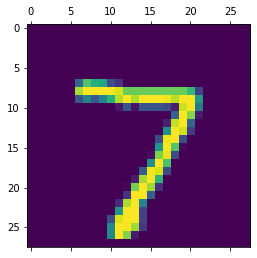

In [20]:
plt.matshow(X_test[0])

In [21]:
np.argmax(y_predict[0])

7

In [22]:
y_predict_labels = [np.argmax(i) for i in y_predict]

In [23]:
y_predict_labels[:5]

[7, 2, 1, 0, 4]

In [24]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

puting confusion matrix to se how much prdeicted are correct

In [25]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predict_labels)
cm


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    2,    2,    0,    5,    7,    2,    2,    0],
       [   0, 1114,    4,    2,    0,    1,    3,    2,    9,    0],
       [   3,    7,  934,   14,    8,    5,    9,   11,   38,    3],
       [   3,    0,   21,  916,    0,   23,    2,   12,   27,    6],
       [   1,    1,    5,    1,  920,    0,    7,    5,   11,   31],
       [   8,    2,    3,   33,    8,  777,   13,    7,   36,    5],
       [  10,    3,    9,    1,    7,   11,  912,    2,    3,    0],
       [   1,    6,   25,    2,    5,    0,    0,  961,    3,   25],
       [   7,    7,    6,   16,    9,   19,    7,   12,  885,    6],
       [   9,    7,    1,    9,   24,    6,    0,   32,   10,  911]])>

Text(69.0, 0.5, 'Truth')

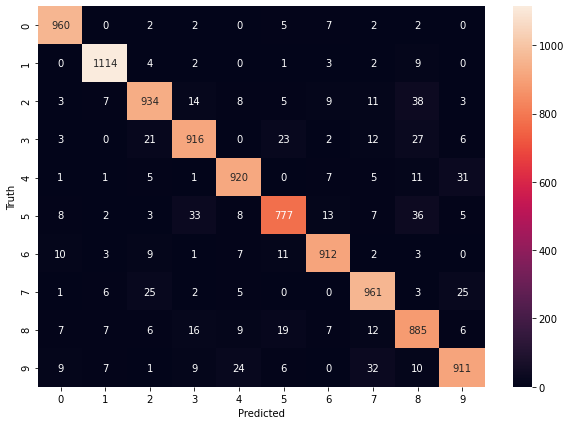

In [26]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Using hidden layer we will compile the code  for accuracy

In [30]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 33us/sample - loss: 0.2984 - accuracy: 0.9158s - loss: 0.3
Epoch 2/5
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1380 - accuracy: 0.9606
Epoch 3/5
60000/60000 [==============================] - 2s 29us/sample - loss: 0.0995 - accuracy: 0.9707
Epoch 4/5
60000/60000 [==============================] - 2s 29us/sample - loss: 0.0767 - accuracy: 0.9773s -
Epoch 5/5
60000/60000 [==============================] - 2s 30us/sample - loss: 0.0621 - accuracy: 0.9811


In [31]:
model.evaluate(X_test_flattened,y_test)

10000/10000 [==============================] - 0s 25us/sample - loss: 0.0849 - accuracy: 0.9751


[0.084853236301383, 0.9751]

In [33]:
y_predict = model.predict(X_test_flattened)
y_predict[0]

array([7.2955675e-07, 2.5526246e-08, 3.3518962e-05, 4.4552132e-04,
       7.4924911e-10, 3.9837209e-07, 1.2974311e-10, 9.4836468e-01,
       4.4656094e-06, 4.5448767e-05], dtype=float32)

In [34]:
y_predict_labels = [np.argmax(i) for i in y_predict]

In [36]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predict_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 972,    0,    0,    1,    1,    0,    2,    2,    1,    1],
       [   0, 1120,    2,    1,    0,    0,    5,    1,    6,    0],
       [  10,    3,  991,    4,    4,    1,    3,    2,   13,    1],
       [   0,    0,    1,  990,    1,    5,    0,    5,    4,    4],
       [   1,    0,    0,    1,  960,    0,    5,    1,    2,   12],
       [   4,    0,    0,    6,    1,  867,    8,    2,    2,    2],
       [   5,    3,    1,    1,    7,    3,  937,    0,    1,    0],
       [   1,    3,    8,    4,    2,    0,    0, 1005,    1,    4],
       [   6,    0,    2,    5,    8,    7,    5,    3,  936,    2],
       [   0,    4,    0,    9,   11,    2,    0,    7,    3,  973]])>

Text(69.0, 0.5, 'Truth')

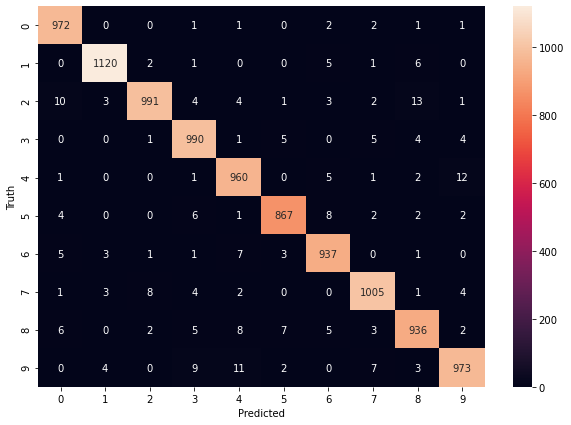

In [37]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')